In [9]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt


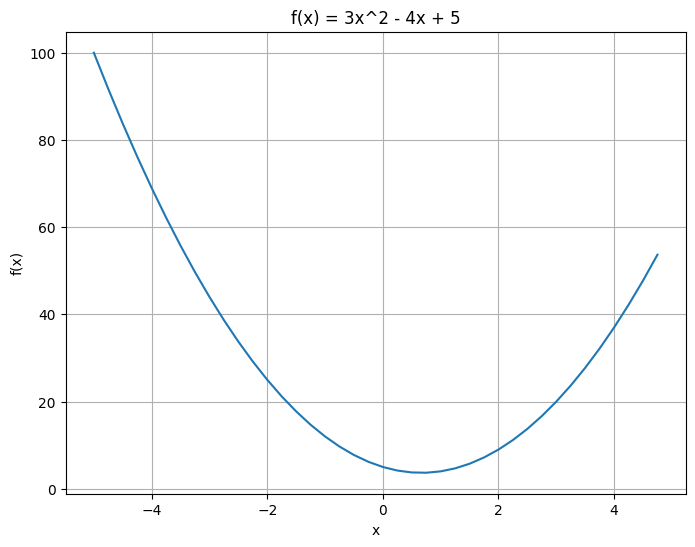

The exact derivative at x=3.0 is 14.0
The numerical derivative is: 14.000300000063248
Partial derivative w.r.t 'a': -3.000000000010772, Expected: -3.0
Partial derivative w.r.t 'b': 2.0000000000042206, Expected: 2.0


In [10]:
# =============================================================================
# PART 1: Understanding Derivatives
# =============================================================================

def f(x):
    return 3*x**2 - 4*x + 5

# Let's see how the function looks
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.figure(figsize=(8, 6))
plt.plot(xs, ys)
plt.title("f(x) = 3x^2 - 4x + 5")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

# TASK 1.1: Find the derivative of f(x) w.r.t x at x=3.0 numerically.
h = 0.0001
x = 3.0

# Calculate the value of the function at x
f_x = f(x)

# Calculate the value of the function at x + h
f_x_plus_h = f(x + h)

# Calculate the slope (the numerical derivative)
slope = (f_x_plus_h - f_x) / h

print(f"The exact derivative at x=3.0 is 14.0")
print(f"The numerical derivative is: {slope}")

# TASK 1.2: Find the partial derivative of d with respect to 'a' and 'b'.
h = 0.0001
a = 2.0
b = -3.0
c = 10.0

# Initial expression
d1 = a*b + c

# --- Derivative w.r.t 'a' ---
a_new = a + h
d2_wrt_a = a_new*b + c
slope_a = (d2_wrt_a - d1) / h
print(f"Partial derivative w.r.t 'a': {slope_a}, Expected: {b}")

# --- Derivative w.r.t 'b' ---
b_new = b + h
d2_wrt_b = a*b_new + c
slope_b = (d2_wrt_b - d1) / h
print(f"Partial derivative w.r.t 'b': {slope_b}, Expected: {a}")


In [11]:
# =============================================================================
# PART 2: Creating an Automatic Differentiation Engine
# =============================================================================

class Value:
    """
    A class for a value that can be used in a computational graph.
    """
    
    def __init__(self, data, _children=(), _op='', label=''):
        # Initialize all the attributes
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self._backward = lambda: None

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        return out

# Test the implementation
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'

print(d)        # Expected: Value(data=4.0)
print(d._prev)  # Expected: {Value(data=10.0), Value(data=-6.0)}
print(d._op)    # Expected: '+'


Value(data=4.0)
{Value(data=10.0), Value(data=-6.0)}
+


In [12]:
# =============================================================================
# VISUALIZATION CODE (PROVIDED)
# =============================================================================

try:
    from graphviz import Digraph
    
    def trace(root):
        # builds a set of all nodes and edges in a graph
        nodes, edges = set(), set()
        def build(v):
            if v not in nodes:
                nodes.add(v)
                for child in v._prev:
                    edges.add((child, v))
                    build(child)
        build(root)
        return nodes, edges

    def draw_dot(root):
        dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
        
        nodes, edges = trace(root)
        for n in nodes:
            uid = str(id(n))
            dot.node(name=uid, label="{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
            if n._op:
                dot.node(name=uid + n._op, label=n._op)
                dot.edge(uid + n._op, uid)

        for n1, n2 in edges:
            dot.edge(str(id(n1)), str(id(n2)) + n2._op)

        return dot
    
    print("Graphviz visualization available!")
    
except ImportError:
    print("Graphviz not available - visualization will be skipped")
    def draw_dot(root):
        print("Visualization skipped - graphviz not installed")
        return None

# Create and visualize the graph
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'

print(f"L = {L.data}")


Graphviz not available - visualization will be skipped
L = -8.0


In [13]:
# =============================================================================
# TASK 2.3: Manual Backpropagation
# =============================================================================


L.grad = 1.0

# Calculate the gradient for d and f
# d.grad = dL/dd = f.data (because L = d * f, so dL/dd = f)
# f.grad = dL/df = d.data (because L = d * f, so dL/df = d)
d.grad = f.data
f.grad = d.data

print(f"L.grad = {L.grad}")
print(f"d.grad = {d.grad}")
print(f"f.grad = {f.grad}")

# Calculate the gradient for c and e
# c.grad = d.grad * 1.0 (because d = e + c, so dd/dc = 1)
# e.grad = d.grad * 1.0 (because d = e + c, so dd/de = 1)
c.grad = d.grad * 1.0
e.grad = d.grad * 1.0

print(f"c.grad = {c.grad}")
print(f"e.grad = {e.grad}")

# Calculate the gradient for a and b
# a.grad = e.grad * b.data (because e = a * b, so de/da = b)
# b.grad = e.grad * a.data (because e = a * b, so de/db = a)
a.grad = e.grad * b.data
b.grad = e.grad * a.data

print(f"a.grad = {a.grad}")
print(f"b.grad = {b.grad}")


L.grad = 1.0
d.grad = -2.0
f.grad = 4.0
c.grad = -2.0
e.grad = -2.0
a.grad = 6.0
b.grad = -4.0


In [14]:
# =============================================================================
# PART 2.4: Automating Backpropagation - Complete Value Class
# =============================================================================

class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            # The gradient of the output should be propagated to the inputs
            # The local derivative for '+' is 1.0
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        
        def _backward():
            # The local derivative for '*' is the other value
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward
        return out
    
    def __neg__(self):
        return self * -1

    def __radd__(self, other):
        return self + other

    def __sub__(self, other):
        return self + (-other)

    def __rsub__(self, other):
        return other + (-self)

    def __rmul__(self, other):
        return self * other

    def __truediv__(self, other):
        return self * other**-1

    def __rtruediv__(self, other):
        return other * self**-1
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            # The local derivative of tanh(x) is 1 - tanh(x)^2
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out
    
    def relu(self):
        """ReLU activation function"""
        out = Value(0 if self.data < 0 else self.data, (self,), 'ReLU')
        
        def _backward():
            self.grad += (out.data > 0) * out.grad
        out._backward = _backward
        return out
    
    def sigmoid(self):
        """Sigmoid activation function"""
        x = self.data
        s = 1 / (1 + math.exp(-x))
        out = Value(s, (self,), 'sigmoid')
        
        def _backward():
            self.grad += s * (1 - s) * out.grad
        out._backward = _backward
        return out
    
    def exp(self):
        """Exponential function"""
        x = self.data
        out = Value(math.exp(x), (self,), 'exp')
        
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out
    
    def log(self):
        """Natural logarithm function"""
        x = self.data
        out = Value(math.log(x), (self,), 'log')
        
        def _backward():
            self.grad += (1/x) * out.grad
        out._backward = _backward
        return out

    def backward(self):
        # Create a topological sort of the graph
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        
        # Set the gradient of the final output node to 1.0
        self.grad = 1.0
        
        # Iterate through nodes in reverse topological order
        for node in reversed(topo):
            node._backward()


In [15]:
# Test automated backpropagation on a neuron
print("\n=== Testing Automated Backpropagation ===")

# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

# Run the backward pass
o.backward()

print(f"o.grad = {o.grad}")
print(f"n.grad = {n.grad}")
print(f"b.grad = {b.grad}")
print(f"x1w1x2w2.grad = {x1w1x2w2.grad}")
print(f"x1w1.grad = {x1w1.grad}")
print(f"x2w2.grad = {x2w2.grad}")
print(f"x1.grad = {x1.grad}")
print(f"x2.grad = {x2.grad}")
print(f"w1.grad = {w1.grad}")
print(f"w2.grad = {w2.grad}")



=== Testing Automated Backpropagation ===
o.grad = 1.0
n.grad = 0.4999999999999999
b.grad = 0.4999999999999999
x1w1x2w2.grad = 0.4999999999999999
x1w1.grad = 0.4999999999999999
x2w2.grad = 0.4999999999999999
x1.grad = -1.4999999999999996
x2.grad = 0.4999999999999999
w1.grad = 0.9999999999999998
w2.grad = 0.0


In [16]:
# =============================================================================
# PART 3.1 : Building a Neural Network (Module)
# =============================================================================

class Module:
    def zero_grad(self):
        for p in self.parameters():
            p.grad = 0

    def parameters(self):
        return []

class Neuron(Module):
    def __init__(self, nin, activation='tanh'):
        # A neuron has 'nin' weights (w) and one bias (b)
        # Initialize weights randomly between -1 and 1
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))
        self.activation = activation
  
    def __call__(self, x):
        # Compute the activation of the neuron
        # Formula: act = w[0]*x[0] + w[1]*x[1] + ... + b
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        # Apply activation function
        if self.activation == 'tanh':
            return act.tanh()
        elif self.activation == 'relu':
            return act.relu()
        elif self.activation == 'sigmoid':
            return act.sigmoid()
        else:
            return act  # linear
  
    def parameters(self):
        return self.w + [self.b]


In [17]:
# =============================================================================
# PART 3.2 : Building a Neural Network (Layer)
# =============================================================================


class Layer(Module):
    def __init__(self, nin, nout, activation='tanh'):
        # A layer is a list of neurons
        self.neurons = [Neuron(nin, activation) for _ in range(nout)]
  
    def __call__(self, x):
        # When you call a layer, you call each neuron with the input x
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
  
    def parameters(self):
        # A layer's parameters are all the parameters from all its neurons
        return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP(Module):
    def __init__(self, nin, nouts, activations=None):
        # Set default activations if not provided
        if activations is None:
            activations = ['tanh'] * len(nouts)
        
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1], activations[i]) for i in range(len(nouts))]
  
    def __call__(self, x):
        # Pass the input 'x' through all the layers sequentially
        for layer in self.layers:
            x = layer(x)
        return x
  
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

# Test the network
print("\n=== Testing Neural Network ===")
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
output = n(x)
print(f"Network output: {output}")
print(f"Number of parameters: {len(n.parameters())}")



=== Testing Neural Network ===
Network output: Value(data=0.2644029320377739)
Number of parameters: 41


In [18]:
# =============================================================================
# PART 4: Training the Network
# =============================================================================

print("\n=== Training Simple Network ===")

# Dataset
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0]  # desired targets

# Initialize the network
n = MLP(3, [4, 4, 1])

# Training loop
n_epochs = 20
lr = 0.05

for epoch in range(n_epochs):
    # 1. Forward Pass
    ypred = [n(x) for x in xs]

    # 2. Compute Loss (Mean Squared Error)
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

    # 3. Backward Pass
    # Zero out the old gradients
    n.zero_grad()
    # Run the backward pass to compute new gradients
    loss.backward()
    
    # 4. Update Parameters
    for p in n.parameters():
        p.data -= lr * p.grad
        
    print(f'Epoch {epoch} Loss {loss.data:.4f}')

print("Final predictions:", [pred.data for pred in [n(x) for x in xs]])



=== Training Simple Network ===
Epoch 0 Loss 5.3342
Epoch 1 Loss 4.3509
Epoch 2 Loss 4.1010
Epoch 3 Loss 3.9798
Epoch 4 Loss 3.9289
Epoch 5 Loss 3.8826
Epoch 6 Loss 3.8342
Epoch 7 Loss 3.7784
Epoch 8 Loss 3.7095
Epoch 9 Loss 3.6195
Epoch 10 Loss 3.4975
Epoch 11 Loss 3.3302
Epoch 12 Loss 3.1119
Epoch 13 Loss 2.8685
Epoch 14 Loss 2.6594
Epoch 15 Loss 2.4689
Epoch 16 Loss 2.1014
Epoch 17 Loss 1.3220
Epoch 18 Loss 0.7628
Epoch 19 Loss 0.5111
Final predictions: [0.7139484403554412, -0.6279582724806838, -0.8818945213980857, 0.6193499334353292]


In [19]:
# =============================================================================
# PART 5: Handwritten Digit Recognition
# =============================================================================

print("\n=== Loading Digit Recognition Data ===")

from sklearn import datasets
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))  # Flatten images to 64-element vectors

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=True, random_state=42
)

# Normalize pixel values to be between 0 and 1
X_train = X_train / 16.0
X_test = X_test / 16.0

# One-hot encode the labels
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((len(y), num_classes))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

num_classes = 10
y_train_one_hot = one_hot_encode(y_train, num_classes)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Network architecture: 64 inputs -> 32 hidden -> 10 outputs
neural_network = MLP(64, [32, 10], activations=['relu', 'sigmoid'])
print(f"Number of parameters: {len(neural_network.parameters())}")

# Helper function for batching
def create_batches(X, y, batch_size):
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    for start_idx in range(0, len(X), batch_size):
        end_idx = min(start_idx + batch_size, len(X))
        batch_indices = indices[start_idx:end_idx]
        yield X[batch_indices], y[batch_indices]

print("\n=== Training Digit Recognition Network ===")

lr = 1.0
batch_size = 32
n_epochs = 10

for epoch in range(n_epochs):
    epoch_loss = 0
    batch_count = 0
    
    for X_batch, y_batch in create_batches(X_train, y_train_one_hot, batch_size):
        # 1. Forward Pass
        inputs = [list(map(Value, xrow)) for xrow in X_batch]
        ypred_batch = [neural_network(x) for x in inputs]

        # 2. Compute Loss for the batch
        # Convert true labels to Value objects
        y_batch_values = [[Value(y_val) for y_val in y_row] for y_row in y_batch]
        
        # Calculate MSE loss
        loss = Value(0)
        for ypred, ytrue in zip(ypred_batch, y_batch_values):
            for yp, yt in zip(ypred, ytrue):
                loss = loss + (yp - yt)**2
        loss = loss * (1.0 / len(X_batch))

        # 3. Backward Pass
        neural_network.zero_grad()
        loss.backward()
        
        # 4. Update Parameters
        for p in neural_network.parameters():
            p.data -= lr * p.grad
        
        epoch_loss += loss.data
        batch_count += 1

    avg_loss = epoch_loss / batch_count
    print(f"Epoch {epoch + 1}, Average Loss: {avg_loss:.4f}")
    # Decrease learning rate over time
    lr *= 0.9

# Evaluation
print("\n=== Evaluating Model ===")

def evaluate_model(model, X_test, y_test):
    correct = 0
    total = len(X_test)
    
    inputs = [list(map(Value, xrow)) for xrow in X_test]
    
    for i in range(total):
        outputs = model(inputs[i])
        predicted_class = np.argmax([p.data for p in outputs])
        
        if predicted_class == y_test[i]:
            correct += 1
    
    accuracy = correct / total
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    return accuracy

accuracy = evaluate_model(neural_network, X_test, y_test)

# Show sample predictions
def show_sample_predictions(model, X_test, y_test, n_samples=5):
    print(f"\n=== Sample Predictions ===")
    inputs = [list(map(Value, xrow)) for xrow in X_test[:n_samples]]
    
    for i in range(n_samples):
        outputs = model(inputs[i])
        predicted_class = np.argmax([p.data for p in outputs])
        true_class = y_test[i]
        confidence = max([p.data for p in outputs])
        
        status = "✓" if predicted_class == true_class else "✗"
        print(f"Sample {i+1}: True={true_class}, Pred={predicted_class}, Conf={confidence:.3f} {status}")

show_sample_predictions(neural_network, X_test, y_test)



=== Loading Digit Recognition Data ===
Training data shape: (1437, 64)
Test data shape: (360, 64)
Number of parameters: 2410

=== Training Digit Recognition Network ===
Epoch 1, Average Loss: 1.0074


KeyboardInterrupt: 

In [22]:
!pip install torch torchvision torchaudio

   ---------------------------------------- 0.0/241.3 MB ? eta -:--:--
   ---------------------------------------- 0.5/241.3 MB 4.2 MB/s eta 0:00:57
   ---------------------------------------- 1.3/241.3 MB 4.0 MB/s eta 0:01:01
   ---------------------------------------- 2.1/241.3 MB 3.9 MB/s eta 0:01:02
   ---------------------------------------- 2.9/241.3 MB 4.0 MB/s eta 0:01:00
    --------------------------------------- 3.7/241.3 MB 4.0 MB/s eta 0:01:00
    --------------------------------------- 4.5/241.3 MB 3.9 MB/s eta 0:01:00
    --------------------------------------- 5.2/241.3 MB 3.9 MB/s eta 0:01:00
    --------------------------------------- 5.5/241.3 MB 3.9 MB/s eta 0:01:00
   - -------------------------------------- 6.6/241.3 MB 3.8 MB/s eta 0:01:02
   - -------------------------------------- 7.1/241.3 MB 3.7 MB/s eta 0:01:03
   - -------------------------------------- 8.1/241.3 MB 3.9 MB/s eta 0:01:01
   - -------------------------------------- 8.9/241.3 MB 3.8 MB/s eta 0

In [23]:
# =============================================================================
# PART 6: PyTorch Implementation
# =============================================================================

print("\n=== PyTorch Implementation ===")

try:
    import torch
    import torch.nn as nn
    import torch.optim as optim
    from torch.utils.data import TensorDataset, DataLoader
    
    # TASK 6.1: Convert data to PyTorch Tensors and create DataLoaders
    X_train_tensor = torch.from_numpy(X_train).float()
    y_train_tensor = torch.from_numpy(y_train).long()
    
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    batch_size = 32
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    X_test_tensor = torch.from_numpy(X_test).float()
    y_test_tensor = torch.from_numpy(y_test).long()
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    print("PyTorch data prepared successfully!")
    
    # Check a batch
    data_batch, labels_batch = next(iter(train_loader))
    print(f"Data batch shape: {data_batch.shape}")
    print(f"Labels batch shape: {labels_batch.shape}")
    
    # TASK 6.2: Define the neural network architecture
    class MLP_PyTorch(nn.Module):
        def __init__(self):
            super().__init__()
            self.layer1 = nn.Linear(64, 32)
            self.activation = nn.ReLU()
            self.layer2 = nn.Linear(32, 10)

        def forward(self, x):
            x = self.layer1(x)
            x = self.activation(x)
            x = self.layer2(x)
            return x

    # Instantiate the model
    model = MLP_PyTorch()
    print(model)
    
    # TASK 6.3: Instantiate the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    learning_rate = 0.001
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate)
    
    # TASK 6.4: Complete the PyTorch training loop
    n_epochs = 10
    
    print("\nTraining PyTorch model...")
    for epoch in range(n_epochs):
        epoch_loss = 0.0
        for X_batch, y_batch in train_loader:
            # 1. Zero the gradients
            optimizer.zero_grad()
            
            # 2. Forward pass
            outputs = model(X_batch)

            # 3. Calculate the loss
            loss = criterion(outputs, y_batch)

            # 4. Backward pass
            loss.backward()
            
            # 5. Update weights
            optimizer.step()

            epoch_loss += loss.item()

        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {epoch_loss/len(train_loader):.4f}")

    print("PyTorch training finished!")
    
    # Evaluation
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    accuracy = 100 * correct / total
    print(f'PyTorch Model Accuracy: {accuracy:.2f}%')
    
except ImportError:
    print("PyTorch not available - skipping PyTorch implementation")
    print("To install PyTorch, run: pip install torch torchvision")




=== PyTorch Implementation ===
PyTorch data prepared successfully!
Data batch shape: torch.Size([32, 64])
Labels batch shape: torch.Size([32])
MLP_PyTorch(
  (layer1): Linear(in_features=64, out_features=32, bias=True)
  (activation): ReLU()
  (layer2): Linear(in_features=32, out_features=10, bias=True)
)

Training PyTorch model...
Epoch 1/10, Loss: 2.2285
Epoch 2/10, Loss: 1.9813
Epoch 3/10, Loss: 1.6428
Epoch 4/10, Loss: 1.2868
Epoch 5/10, Loss: 0.9939
Epoch 6/10, Loss: 0.7833
Epoch 7/10, Loss: 0.6378
Epoch 8/10, Loss: 0.5361
Epoch 9/10, Loss: 0.4607
Epoch 10/10, Loss: 0.4051
PyTorch training finished!
PyTorch Model Accuracy: 91.67%
